<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from IPython.display import display

<h2>Zadanie 1.</h2>

Definicja funkcji

In [20]:
# function definition
def f(x):
    return 4 / (1 + x**2)

Definicja formuł obliczających pola pod wykresem

In [3]:
# midpoint rectangular formula
def rect(a, b, f):
    return (b-a) * f((a+b)/2)

# trapezoidal formula
def trap(a, b, f):
    return (b-a)/2 * (f(a) + f(b))

# Simpson formula
def simp(a, b, f):
    return (b-a)/6 * (f(a) + 4*f((a+b)/2) + f(b))

Funkcja generujące odcięte węzłów

In [4]:
# generate uniform nodes xs
def uniform_xs(range_start, range_end, count):
    return np.linspace(range_start, range_end, count)

Funkcja obliczająca wartość całki oznaczonej

In [5]:
# calculate integral
def integral(f, nodes, formula):
    return np.sum(formula(nodes[:-1], nodes[1:], f))

<h3>a) Całka dla wszystkich trzech formuł i $2^m + 1$ równoodległych węzłów, $m = 1,2,...,25$</h3>

Definicja zbioru węzłów

In [6]:
# define ms
ms = np.arange(1, 26, 1)

# nodes array
nodes_xs = [uniform_xs(0, 1, 2**m + 1) for m in ms]

Obliczenie wartości w zależności od $m$ i formuły

In [7]:
# midpoint rectangular formula values
rect_values = np.array([integral(f, xs, rect) for xs in nodes_xs])
# trapezoidal formula values
trap_values = np.array([integral(f, xs, trap) for xs in nodes_xs])
# Simpson formula values
simp_values = np.array([integral(f, xs, simp) for xs in nodes_xs])

Obliczenie wartości bezwzględnej błędu względnego dla otrzymanych wartości

In [8]:
# midpoint rectangular formula errors
rect_errors = np.abs(rect_values - np.pi) / np.pi
# trapezoidal formula errors
trap_errors = np.abs(trap_values - np.pi) / np.pi
# Simpson formula errors
simp_errors = np.abs(simp_values - np.pi) / np.pi

Narysowanie bezwzględnej wartości błędu względnego w zależności od liczby ewaluacji podcałkowych

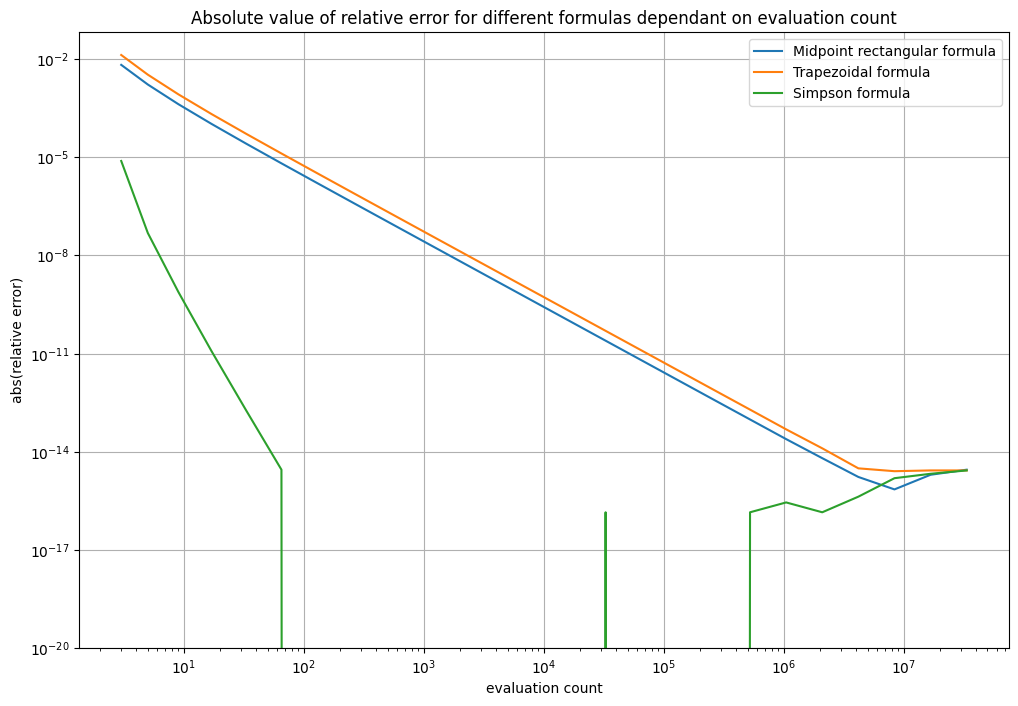

In [9]:
# set figsize
plt.figure(figsize = (12,8))
# plot rect errors
plt.plot(2**ms + 1, rect_errors, label="Midpoint rectangular formula")
# plot trap errors
plt.plot(2**ms + 1, trap_errors, label="Trapezoidal formula")
# plot simp errors
plt.plot(2**ms + 1, simp_errors, label="Simpson formula")
# set title and axes names
plt.title("Absolute value of relative error for different formulas dependant on evaluation count")
plt.xlabel("evaluation count")
plt.ylabel("abs(relative error)")
# set both axes to logarithmic scales
plt.xscale("log")
plt.yscale("log")
# set y-limit
plt.ylim(bottom=1e-20)
# show plot with grid and legend
plt.grid()
plt.legend()
plt.show()

<h3>b) Wyznaczenie $h_{min}$ - kroku $h$, dla którego błąd jest najmniejszy</h3>

Wyznaczenie $h_{min}$

In [10]:
# hs array
hs = 1.0 / (2 ** ms)
# h_min for rect
rect_h_min = hs[np.argmin(rect_errors)]
# h_min for trap
trap_h_min = hs[np.argmin(trap_errors)]
# h_min for simp
simp_h_min = hs[np.argmin(simp_errors)]

Wypisanie $h_{min}$

In [11]:
h_min_df = pd.DataFrame(data={
    "formula": ["midpoint rectangular", "trapezoidal", "Simpson"],
    r"$h_{min}$": [rect_h_min, trap_h_min, simp_h_min]
});
h_min_df

,formula,$h_{min}$
0,midpoint rectangular,1.192093e-07
1,trapezoidal,1.192093e-07
2,Simpson,7.812500e-03


<h3>c) Porównanie rzędu zbieżności teoretycznego z empirycznym</h3>

<h4>Teoretyczne rzędy zbieżności</h4>

In [12]:
# theoretical convergence order for rect
rect_theory_conv = 2
# theoretical convergence order for trap
trap_theory_conv = 2
# theoretical convergence order for simp
simp_theory_conv = 4

<h4>Empiryczne rzędy zbieżności - $p = \log{\frac{E(h_{k+1})}{E(h_k)}} / \log{\frac{h_{k+1}}{h_k}}$</h4>

Funkcja licząca empiryczny rząd zbieżności

Używamy: $h_k = {n_k}^{-1}$ ($n_k = 2^{m_k} + 1$ to liczba ewaluacji) $\implies \log{\frac{h_{k+1}}{h_k}} = \log{\frac{n_k}{n_{k+1}}}$, by ominąć działanie na liczbach bliskich 0

In [13]:
# calculate order of convergence
def calc_conv_order(errors, ms):
    evals = 2**ms + 1
    rounding_errors = evals * np.finfo(np.float64).eps
    mask = rounding_errors < errors/2
    chosen_errors = errors[mask]
    chosen_evals = evals[mask]
    chosen_ms = ms[mask][:-1]
    return np.log(chosen_errors[1:] / chosen_errors[:-1]) / np.log(chosen_evals[:-1] / chosen_evals[1:]), chosen_ms

Wyliczenie empirycznych rzędów zbieżności

In [14]:
# empirical convergence order for rect
rect_emp_conv = calc_conv_order(rect_errors, ms)
# empirical convergence order for trap
trap_emp_conv = calc_conv_order(trap_errors, ms)
# empirical convergence order for simp
simp_emp_conv = calc_conv_order(simp_errors, ms)

<h4>Wypisanie porównań rzędów zbieżności</h4>

Funkcja wypisująca porównanie rzędu zbieżności

In [15]:
# print out comparison between theoretical and empirical convergence order
def print_comparison_conv(theory, emp, indices):
    df = pd.DataFrame(data={
        r"indeks $k$": indices,
        "rząd zbieżności": emp
    })
    print(f"Teoretyczny rząd zbieżności: {theory}")
    print("Empiryczny rząd zbieżności w zależności od indeksu k:")
    display(df)

Wypisanie porównania dla metody prostokątów

In [16]:
print_comparison_conv(rect_theory_conv, rect_emp_conv[0], rect_emp_conv[1])

Teoretyczny rząd zbieżności: 2
Empiryczny rząd zbieżności w zależności od indeksu k:


,indeks $k$,rząd zbieżności
0,1,2.707131
1,2,2.358356
2,3,2.179738
3,4,2.090014
4,5,2.045045
5,6,2.022532
6,7,2.011269
7,8,2.005635
8,9,2.002818
9,10,2.001409


Wypisanie porównania dla metody trapezów

In [17]:
print_comparison_conv(trap_theory_conv, trap_emp_conv[0], trap_emp_conv[1])

Teoretyczny rząd zbieżności: 2
Empiryczny rząd zbieżności w zależności od indeksu k:


,indeks $k$,rząd zbieżności
0,1,2.710441
1,2,2.358425
2,3,2.179742
3,4,2.090014
4,5,2.045045
5,6,2.022532
6,7,2.011269
7,8,2.005635
8,9,2.002818
9,10,2.001409


Wypisanie porównania dla metody Simpsona

In [18]:
print_comparison_conv(simp_theory_conv, simp_emp_conv[0], simp_emp_conv[1])

Teoretyczny rząd zbieżności: 4
Empiryczny rząd zbieżności w zależności od indeksu k:


,indeks $k$,rząd zbieżności
0,1,9.922662
1,2,7.072943
2,3,6.539051
3,4,6.270405


<h2>Zadanie 2.</h2>